# Import all the Dependencies

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf


In [5]:
# initializing the CNN

CNN_Classifier=Sequential()


In [6]:
# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))


In [7]:
#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

In [9]:

#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))


In [10]:
# flattening

CNN_Classifier.add(Flatten())

In [11]:
# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))

In [12]:
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Summary

In [13]:
CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

# Building and Compiling the Model

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Apple_Leaf_Disease\train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Apple_Leaf_Disease\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 4371 images belonging to 2 classes.
Found 2309 images belonging to 2 classes.


In [23]:
r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=1,
        validation_data=test_set,
        
        validation_steps=len(test_set))

137/137 [==============================] - 387s 3s/step - loss: 0.1687 - accuracy: 0.9359 - val_loss: 0.0614 - val_accuracy: 0.9818


In [194]:
scores = CNN_Classifier.evaluate(test_set)

73/73 [==============================] - 82s 1s/step - loss: 0.0608 - accuracy: 0.9788


# Saving the Model

In [195]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\Apple_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\Apple_model.h5')

# Defining Classes

In [16]:
training_set.class_indices

{'Apple scab': 0, 'Healthy': 1}

In [17]:
class_names = list(training_set.class_indices.keys())
class_names

['Apple scab', 'Healthy']

In [18]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.6499178  0.61854523 0.7126629 ]
  [0.6588436  0.627471   0.7215887 ]
  [0.639259   0.60788643 0.7020041 ]
  ...
  [0.58428943 0.54899526 0.67056394]
  [0.5928388  0.5575447  0.6791133 ]
  [0.58695555 0.55166143 0.67323005]]

 [[0.590629   0.55925643 0.6533741 ]
  [0.6228726  0.59150004 0.6856177 ]
  [0.6200373  0.58866477 0.6827825 ]
  ...
  [0.5961923  0.5608982  0.6824668 ]
  [0.5914317  0.55613756 0.6777062 ]
  [0.574753   0.5394589  0.6610275 ]]

 [[0.5705309  0.53915834 0.633276  ]
  [0.5513483  0.5199758  0.6140934 ]
  [0.54132974 0.5099572  0.60407484]
  ...
  [0.58017683 0.5448827  0.66645133]
  [0.590843   0.5555489  0.6771175 ]
  [0.57224363 0.5369495  0.65851814]]

 ...

 [[0.76942503 0.71844465 0.7851113 ]
  [0.7310967  0.6801163  0.74678296]
  [0.7130632  0.6620828  0.72874945]
  ...
  [0.82662284 0.77564245 0.8423091 ]
  [0.77210623 0.7211258  0.7877925 ]
  [0.69658947 0.6456091  0.71227574]]

 [[0.80356944 0.752589   0.8192557 ]
  [0.82660043 0.77562004 0.8422867 ]


# Plotting

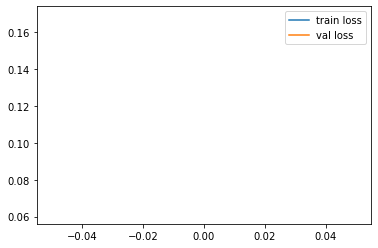

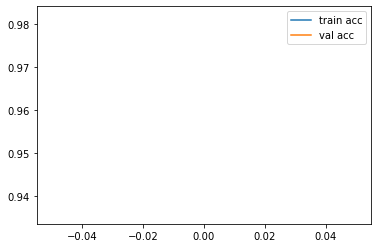

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Run prediction on a sample image

first image to predict
actual label: Apple scab
1/1 [==============================] - 1s 793ms/step
predicted label: Apple scab


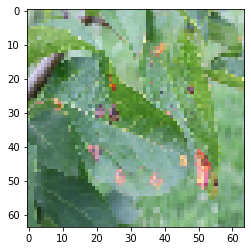

In [27]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break